In [1]:
# plan 
#1: create random data between max min of dataset, same length 
#2: histogramm copy code 
#3: apply code for random data 
#4: compy code for plot 
#5: plot, adjust plot
#6: 

In [1]:
#import packages: 
import matplotlib.pyplot as plt


In [2]:
#1 create random data 
Sd1020_min= -145.46
Sd1020_max= 36.16 
Sd1020_len= 6438 
Sd1020_mean=-15.12
Sd1020_std=30.78
import numpy as np
#rd = np.random.normal(Sd1020_mean, Sd1020_std, Sd1020_len) # only press this if you are sure !!!
#plt.hist(rd)

In [3]:
#safe the random dataset: 
np.savetxt('andom_dataset_len_6438.txt', rd)
#

NameError: name 'rd' is not defined

In [3]:
import xarray as xr 

rd= np.loadtxt("andom_dataset_len_6438.txt")

In [4]:
# import regridded data from Sd1020
import xarray as xr 
r20=xr.open_dataset("detrend/ridded_Qturb_1020.nc")
r23=xr.open_dataset("detrend/ridded_Qturb_1023.nc")


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

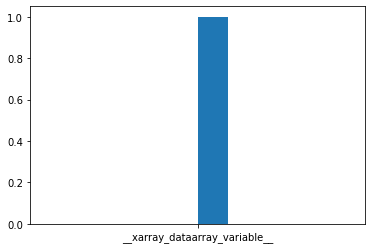

In [5]:
plt.hist(r20)

In [6]:
## Subsampling and histogram: 
def subsamling_means(data, max_res): 
    '''
    input:
    data:data to subsample in array 
    max_res: maximal subsampling frequency (steps of 1 so far)
    
    outut: 
    all_means: means of all subsampled data sets, in list of array, where diffrent means for a sampling frequency mean diffrent starting points 
    mean: mean of all means of the data set from the same sampling frequency
    std: std of the mean of means from same sampling frequency
    corresponding sampling freq: range(1, max_res)
    
    '''
    means=[]
    std=[]
    mean=[]
    all_means=[]
    for i in range(1, max_res):# max reampled res 25km
        means=[]
        for j in np.arange(0, i):
            means.append(np.nanmean(data[j::i]))
        #print(means)
        all_means.append(means)
        mean.append(np.nanmean(means))
        std.append(np.std(means))     
    return all_means, mean, std

In [7]:
## 2: subsample random data: 
rd_sub=subsamling_means(rd, 100)

mean_rd= rd_sub[0]
#std_rd= rd_sub[1]
#std_rd= rd_sub[2]

### old error below ######
#plt.hist(rd_sub[0][5], density=True,)

In [8]:
#subsample loaded 
r20_list=list(r20['__xarray_dataarray_variable__'].values[1:])# change formate to list
sub_20=  subsamling_means(r20_list, 100)  # subsample up tp 100km in resolution 

all_means_1020= sub_20[0] # only show the means from every



In [9]:
all_means_1020[0]

[-15.122003413816662]

In [10]:
p_95_20= [np.percentile(all_means_1020[i],95) for i in range(10)]

#p_95_20

In [11]:
r23_list=list(r23['__xarray_dataarray_variable__'].values[1:])# change formate to list
sub_23=  subsamling_means(r23_list, 100)  # subsample up tp 100km in resolution 

all_means_1023= sub_23[0] # only show the means from every

In [12]:
#plt.plot(np.isnan(r23['__xarray_dataarray_variable__'])*1)

In [13]:
np.min(np.min(mean_rd))

C:\Users\Public\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


-22.49184679445486

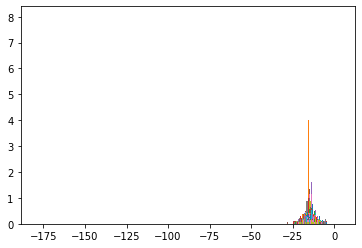

In [18]:
########## try to never re-run this , takes more than 20mins###########

bound20=(-146,37) # max and min of dataset sd1020
y_rd= np.arange(bound20[0]-.0625,bound20[1]+.125+.0625,0.125)-bound20[1]/2+mean_rd[0]

#bins_mean_20=[]
#bins_mean_rd=[]
bins_mean_23=[]
for l in np.arange(0, 99):
    bins_mean_23.append(plt.hist(all_means_1023[l], density=True, bins=y_rd)[0])
    #bins_mean_20.append(plt.hist(all_means_1020[l], density=True, bins=y_rd)[0])
    #bins_mean_rd.append(plt.hist(mean_rd[l], density=True, bins=y_rd)[0])n

In [19]:
# safe the bins !! So the computing won't take forever ! 

#np.savetxt('hist_bins_Sd1020_Qturb_-146_37_0.125.txt', bins_mean_20)
np.savetxt('hist_bins_randomdata_-146_37_0.125.txt', bins_mean_rd)


In [14]:
# open bins from txt files: 
bins_mean_20=np.genfromtxt('hist_bins_Sd1020_Qturb_-146_37_0.125.txt')
bins_mean_rd=np.genfromtxt('hist_bins_randomdata_-146_37_0.125.txt')

bound20=(-146,37) # max and min of dataset sd1020
y_rd= np.arange(bound20[0]-.0625,bound20[1]+.125+.0625,0.125)-bound20[1]/2+mean_rd[0]
#bound20=(-146,37) # max and min of dataset sd1020
#y_rd= np.arange(bound20[0]-.0625,bound20[1]+.125+.0625,0.125)-bound20[1]/2+mean_rd[0]

#np.min(y_rd)

In [15]:
# percentile 95th 
p_95_20= [np.percentile(all_means_1020[i],95) for i in range(99)]
p_5_20= [np.percentile(all_means_1020[i],5) for i in range(99)]


<ipython-input-16-a68f9035f84c>:18: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  c0 = ax1.pcolor(X, Y, b_rd.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())#, snap=True)
<ipython-input-16-a68f9035f84c>:19: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  c0 = ax2.pcolor(X, Y, b_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())#, snap=True)
<ipython-input-16-a68f9035f84c>:20: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creati

C:\Users\Public\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


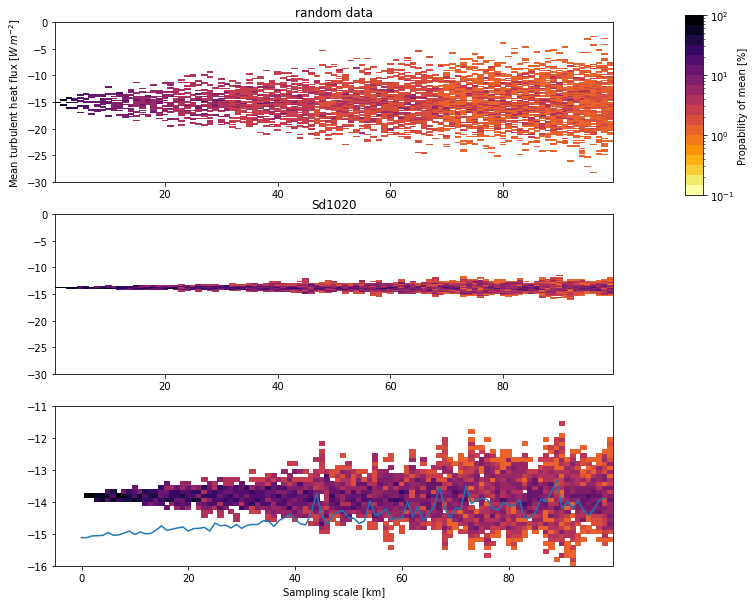

In [16]:
# figure for random data
import matplotlib
import matplotlib.gridspec as gridspec

b_rd = (np.array(bins_mean_rd)/8)*100
b_20 = (np.array(bins_mean_20)/8)*100

cmap = matplotlib.cm.get_cmap("inferno_r", 18)

fig = plt.figure(constrained_layout=True, figsize=(10, 10))
spec = gridspec.GridSpec(ncols=1, nrows=3)#, figure=fig, height_ratios=[6/19*1, 1, 1])
ax1 = fig.add_subplot(spec[0:1, :])
ax2 = fig.add_subplot(spec[1:2, :])
ax3 = fig.add_subplot(spec[2:3, :])


X, Y = np.meshgrid(np.linspace(.5, 99.5, 100), y_rd)
c0 = ax1.pcolor(X, Y, b_rd.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())#, snap=True)
c0 = ax2.pcolor(X, Y, b_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())#, snap=True)
c0 = ax3.pcolor(X, Y, b_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())#, snap=True)

ax3.plot(p_95_20)

ax1.set_ylim(-30, 0)
ax2.set_ylim(-30, 0)
ax3.set_ylim(-16, -11)


ax1.title.set_text('random data')
ax2.title.set_text('Sd1020')
ax2.title.set_text('Sd1020')


ax3.set_xlabel('Sampling scale [km]')
ax1.set_ylabel('Mean turbulent heat flux [$W\:m^{-2}$]')
    
cbar_ax = fig.add_axes([1.0, 0.64, 0.025, 0.25])
fig.colorbar(c0, cax=cbar_ax  , label= 'Propability of mean [%]')
#fig.savefig("cone_figure_randomdata.png", bbox_inches='tight')#, transparent=True)

In [17]:
#example from old code to copy from: 

sub_20=  subsamling_means(regrid_Qturb_1020, 100)

all_means_1020= sub_20[0]
mean_1020= sub_20[1]
std_1020= sub_20[2]

sub_22=  subsamling_means(regrid_Qturb_1022, 100)

all_means_1022= sub_22[0]
mean_1022= sub_22[1]
std_1022= sub_22[2]

sub_23=  subsamling_means(regrid_Qturb_1023, 100)

all_means_1023= sub_23[0]
mean_1023= sub_23[1]
std_1023= sub_23[2]

std_plus_1020=[]
std_minus_1020=[]
std_plus_1022=[]
std_minus_1022=[]
std_plus_1023=[]
std_minus_1023=[]
for i in np.arange(0,99):
    std_plus_1020.append(mean_1020[i]+std_1020[i])
    std_minus_1020.append(mean_1020[i]-std_1020[i])
    std_plus_1022.append(mean_1022[i]+std_1022[i])
    std_minus_1022.append(mean_1022[i]-std_1022[i])
    std_plus_1023.append(mean_1023[i]+std_1023[i])
    std_minus_1023.append(mean_1023[i]-std_1023[i])

NameError: name 'regrid_Qturb_1020' is not defined

In [18]:
#### new figure: codpied figure code from other notebook 
import matplotlib
import matplotlib.gridspec as gridspec

b_20 = (np.array(bins_mean_20)/8)*100
#b_22=(np.array(bins_mean_22)/8)*100
#b_23= (np.array(bins_mean_23)/8)*100

b_20_zoom= (np.array(bins_mean_zoom_20)/8)*100
#b_22_zoom= (np.array(bins_mean_zoom_22)/8)*100
#b_23_zoom= (np.array(bins_mean_zoom_23)/8)*100

cmap = matplotlib.cm.get_cmap("inferno_r", 18)

fig = plt.figure(constrained_layout=True, figsize=(10, 10))
spec = gridspec.GridSpec(ncols=4, nrows=3, figure=fig, height_ratios=[6/19*1, 1, 1])
ax1 = fig.add_subplot(spec[0:1, :])
ax2 = fig.add_subplot(spec[1:2, :])
ax3 = fig.add_subplot(spec[2:, :2])
ax4 = fig.add_subplot(spec[2:, 2:])

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labelbottom=False) 
ax1.xaxis.tick_top()
#ax1.set_xticks([])
ax1.hlines(-3,0,100,linestyle='--', color= 'k')
ax2.hlines(-18,0,100,linestyle='--', color= 'k')
ax3.hlines((p_95_20[0]+.5625),0,100,linestyle='-', color= 'k')
ax3.hlines((p_95_20[0]-.5625),0,100,linestyle='-', color= 'k')

ax4.hlines((p_95_23[0]+.5625),0,100,linestyle='-', color= 'k')
ax4.hlines((p_95_23[0]-.5625),0,100,linestyle='-', color= 'k')

ax1.set_ylim(-3,3)
ax2.set_ylim(-37,-18)
axes= [ax1, ax2]
for a in axes: 
    a.set_xlim(0,100)
    #a.set_facecolor('k') # black background where there is no data


axes_small=[ax3,ax4]
for a in axes_small:
    a.set_xlim(0,30)
    #a.set_facecolor('k') # black background where there is no data
X, Y = np.meshgrid(np.linspace(.5, 99.5, 100), y_alt_20)
X3, Y3 = np.meshgrid(np.linspace(.5, 99.5, 100), y_alt_23)

c_per='#0271cc'#'#4965a8'#'royalblue'#'steelblue'#'grey'
l= 3

c0 = ax1.pcolor(X, Y, b_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())#, snap=True)
ax1.plot(np.linspace(1, 99, 99), p_95_20, c=c_per, linewidth=l-.5, label='95th percentile of means')
ax1.plot(np.linspace(1, 99, 99),p_5_20, c=c_per, linewidth=l-.5, label='5th percentile of means')

#c1 = ax2.pcolor(X3, Y3, b_23.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
c2 = ax2.pcolor(X3, Y3,b_23.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
ax2.plot(np.linspace(1, 99, 99), p_95_23, c=c_per, linewidth=l-.5, label='95th percentile of means')
ax2.plot(np.linspace(1, 99, 99),p_5_23, c=c_per, linewidth=l-.5, label='5th percentile of means')
ax2.set_yticks(np.arange(-36, -16, step=2))
#[ax2.scatter(xaxis_23[i]+1.5, k_23[i]+0.2, marker= '*', color='w', alpha=0.5)for i in range(90)]


c3 = ax3.pcolor(X, Y, b_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
ax3.set_ylim(-.5,1.25)
ax3.plot(np.linspace(1, 99, 99), p_95_20, c=c_per, linewidth=l, label='95th percentile of means', alpha=0.6, zorder=1)
ax3.plot(np.linspace(1, 99, 99),p_5_20, c=c_per, linewidth=l, label='5th percentile of means', alpha=0.6, zorder=1)


##ax4 = fig.add_axes([0.18, 0.3, 0.2, 0.08])
c4 = ax4.pcolor(X3, Y3, b_23.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm(), snap=True)
ax4.plot(np.linspace(1, 99, 99), p_95_23, c=c_per, linewidth=l, label='95th percentile of means', alpha=0.6, zorder=1)
ax4.plot(np.linspace(1, 99, 99), p_5_23, c=c_per, linewidth=l, label='5th percentile of means', alpha=0.6, zorder=1)
ax4.set_ylim(-30, -25)


axes= [ax2, ax3, ax4]
for a in axes:
    a.set_xlabel('Sampling scale [km]')
    a.set_ylabel('Mean turbulent heat flux [$W\:m^{-2}$]')
    #a.set_facecolor('k') # black background where there is no data
#fig.subplots_adjust(top=1)
#fig.colorbar(c2, ax=ax2, label= 'mean of data sets wdiffrent start points [%]')
cbar_ax = fig.add_axes([1.01, 0.5, 0.025, 0.48])
fig.colorbar(c0, cax=cbar_ax  , label= 'Propability of mean [%]')
ax1.annotate('A',xy=[0, 1.05], xycoords='axes fraction', color='k', weight='bold')
ax1.annotate('B',xy=[0.12, 0.75], xycoords='axes fraction', color='gray', weight='bold')
ax2.annotate('C',xy=[0.12, 0.65], xycoords='axes fraction', color='gray', weight='bold')

ax3.annotate('B',xy=[0, 1.05], xycoords='axes fraction', color='k', weight='bold')
ax4.annotate('C',xy=[0, 1.05], xycoords='axes fraction', color='k', weight='bold')

ax1.text(101,-2,'SD 1020\n(summer)', rotation=90, fontsize= 12, color= 'grey')
ax2.text(101,-29,'SD 1023\n(winter)', rotation=90, fontsize= 12, color= 'grey')
xaxis_20=np.linspace(1, 99, 99)
#axis_23=np.linspace(1, 101, 100)
co='steelblue'
a=1
[ax3.scatter(xaxis_20[i], star_20[i]+0.0625, marker= 'o', color=co, alpha= a, s=20, zorder=2) for i in range(30)]
[ax4.scatter(xaxis_20[i], star_23[i]+0.0625, marker= 'o', color=co, alpha=a, s=10, zorder=2) for i in range(30)]

import matplotlib.patches as patches
from matplotlib.patches import Rectangle
#ax3.scatter(np.linspace(1, 99, 99), star_20)
#plt.scatter(range(99), star_23)

ax2.add_patch(Rectangle((25 - .1, -25 - .1), -24.8, -5, fill=None, alpha=1, color='gray', linewidth= 2))
ax1.add_patch(Rectangle((25 - .1, 1.25 - .1), -24.8, -1.75, fill=None, alpha=1, color='gray', linewidth= 2))
#fig.subplots_adjust(hspace = .05)
#fig.savefig("hässlich_blackf_stars_grey_blue.png", bbox_inches='tight')#, transparent=True)

NameError: name 'bins_mean_zoom_20' is not defined